**Importing the Data**

In [2]:
import pandas as pd

In [160]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [126]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [129]:
df["Department"].nunique()

10

In [6]:
left = df['left']

In [8]:
left1 = df[df.left==1]
left1.shape

(3571, 10)

In [9]:
retained = df[df.left==0]
retained.shape

(11428, 10)

### Average Scores on Left VS Retained

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**The table above points out to some crucial essence**

1. Average Monthly Hours are higher in employees who are leaving.
2. The Satisfaction Level score seems to be low on employees who are leaving.
3. Fewer Promotions can lead to employees leaving the organization.

* Although Work Accident seems like something that would have an effect on employees leaving, from the simple average table, we see that it's actually lower in employees leaving. So, it's not that work accidents or embarrassments are a cause for departing in this context, as one might have intuitive thought.

**Time Spend seems like a metric that can affect departures or retainments, but the average apparently does not say so. To understand this, I will go ahead and do a scatterplot. Let's see what's going on!**

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
import numpy as np

In [11]:
corr = df["time_spend_company"].corr(df["left"])
corr

0.14482217493938584

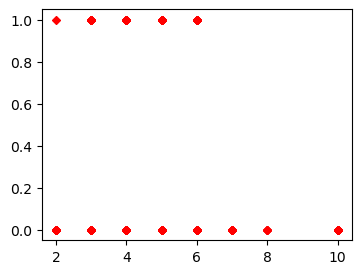

In [51]:
plt.figure(figsize=(4,3))
plt.scatter(df.time_spend_company, df.left, marker = 'D', color = 'red', s = 10)
plt.show()

***Alright so, as we suspected, there is not a clear relationship between time spent and employees leaving. It seems that both employyes who leave eventually or stay spend give or take similar amounts of time. The right bottom numbers are higher, because ofcourse since the employees didn't leave, they went on to stay and their time spent with the company increased.***

## Data Exploration and Visualization

**Impact of Salary on Employee Retention**

<AxesSubplot:xlabel='salary'>

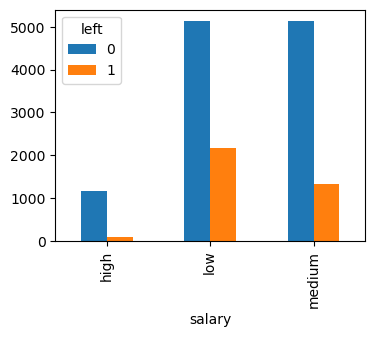

In [16]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar', figsize = (4,3))

The chart shows that number of employees who have high income have a relatively small number of departures compared to low and medium paid employees.

**Employee Retention by Department**

<AxesSubplot:ylabel='Department'>

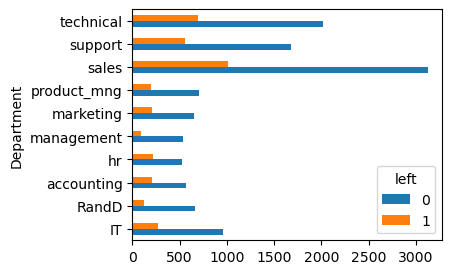

In [18]:
pd.crosstab(df.Department, df.left).plot(kind = 'barh', figsize = (4,3))

**It seems that while for most departments across the company, number of employees leaving are similar, the three departments of Technical, Support, and Sales have the highest turnovers.** 

**Management can use this information to probe into what's going on differently in these departments or what *should* be done differently in these departments.**

## Let's Choose Our Variables !

1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary
5. Department

In [20]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'Department']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department
0,0.38,157,0,low,sales
1,0.80,262,0,medium,sales
2,0.11,272,0,medium,sales
3,0.72,223,0,low,sales
4,0.37,159,0,low,sales


**Handling Salary String Variables: Introducing Dummy Variables**

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
dfle = subdf
dfle.Department = le.fit_transform(dfle.Department)
dfle

C:\Users\adibm\AppData\Local\Temp\ipykernel_19488\582762940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.Department = le.fit_transform(dfle.Department)


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department
0,0.38,157,0,low,7
1,0.80,262,0,medium,7
2,0.11,272,0,medium,7
3,0.72,223,0,low,7
4,0.37,159,0,low,7
...,...,...,...,...,...
14994,0.40,151,0,low,8
14995,0.37,160,0,low,8
14996,0.37,143,0,low,8
14997,0.11,280,0,low,8


In [43]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [67]:
df_with_dummies = pd.concat([dfle,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department,salary_high,salary_low,salary_medium
0,0.38,157,0,low,7,0,1,0
1,0.80,262,0,medium,7,0,0,1
2,0.11,272,0,medium,7,0,0,1
3,0.72,223,0,low,7,0,1,0
4,0.37,159,0,low,7,0,1,0


In [68]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,157,0,7,0,1,0
1,0.80,262,0,7,0,0,1
2,0.11,272,0,7,0,0,1
3,0.72,223,0,7,0,1,0
4,0.37,159,0,7,0,1,0


In [69]:
df_with_dummies.drop('salary_medium',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary_high,salary_low
0,0.38,157,0,7,0,1
1,0.80,262,0,7,0,0
2,0.11,272,0,7,0,0
3,0.72,223,0,7,0,1
4,0.37,159,0,7,0,1


In [70]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary_high,salary_low
0,0.38,157,0,7,0,1
1,0.80,262,0,7,0,0
2,0.11,272,0,7,0,0
3,0.72,223,0,7,0,1
4,0.37,159,0,7,0,1


In [71]:
y = df.left

In [105]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [115]:
department = X.iloc[:, 3:4]

In [116]:
department_encoded = ohe.fit_transform(department)

In [117]:
department_encoded_df = pd.DataFrame(department_encoded.toarray(), columns=ohe.get_feature_names_out())

X = pd.concat([X.drop(columns=["Department"]), department_encoded_df], axis=1)

X = X.drop(columns=["Department_9"])

In [133]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,Department_0,Department_1,Department_2,Department_3,Department_4,Department_5,Department_6,Department_7,Department_8
0,0.38,157,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.80,262,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,272,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,223,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.37,159,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


***Sidenote***: **In case you want to change the name of columns after One Hot Encoding**

**Get the category names**

categories = encoder.get_feature_names(["Department"])

**Convert the one-hot encoded column back to a DataFrame with named columns**

department_encoded_df = pd.DataFrame(department_encoded.toarray(), columns=categories)


In [123]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZS0hzcA5w9I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

***The code below as I have learnt from tutorials is not applicable anymore. "Categorical features" has been dropped from One Hot Encoder, and the new way to do this is by Column Transfer. However, it can get a bit complex if I do like like the classwork, working with all the variables.***

The classwork had much less variables to work with, and it was feasible. The method I followed now is imo better for larger datasets. That is, encoding the categorical variables one at a time. Or even two at at time can be done, but following this tutorial. 
Link to the video: https://www.youtube.com/watch?v=ZS0hzcA5w9I**

***from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder***

***categorical_features = [3]***

***ct = ColumnTransformer(
    [('encoder', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)***

***ct.fit_transform(X)***

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7)

In [203]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)

In [204]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [205]:
y_pred = model.predict(X_test)

In [206]:
predictions_df = pd.DataFrame(y_pred, columns=['Prediction']).reset_index(drop=True)

In [207]:
X_test_with_predictions = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)

In [208]:
X_test_with_predictions

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,Department_0,Department_1,Department_2,Department_3,Department_4,Department_5,Department_6,Department_7,Department_8,Prediction
0,0.66,179,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.86,246,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.65,137,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.46,154,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.64,150,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.00,167,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4496,0.82,214,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4497,0.76,265,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4498,0.36,98,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Accuracy of the Model

In [209]:
model.score(X_test, y_test)

0.772